# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Analyis
Observed Trends
1.  
2.  
3.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
#weather_api_key = "31956b2ede4a3c4f153a9f62517a8431"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_ids = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Base URL and imperial units
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# City data
# CAUTION: This cell takes about 15 minutes to run.

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        city_weather = requests.get(city_url).json()
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
            
        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city

    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 4 of Set 1 | baruun-urt
Processing Record 5 of Set 1 | raudeberg
Processing Record 6 of Set 1 | manduria
Processing Record 7 of Set 1 | ayutla
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | praia da vitoria
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | grindavik
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | orlik
Processing Record 15 of Set 1 | mallama
City not found. Skipping...
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | alotau
City not found. Skipping...
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | phayakkhaphum phisai
Proce

Processing Record 39 of Set 4 | acarau
Processing Record 40 of Set 4 | coshocton
Processing Record 41 of Set 4 | oktyabrskiy
Processing Record 42 of Set 4 | kautokeino
Processing Record 43 of Set 4 | jamestown
Processing Record 44 of Set 4 | paamiut
Processing Record 45 of Set 4 | mar del plata
Processing Record 46 of Set 4 | saint george
Processing Record 47 of Set 4 | westport
Processing Record 48 of Set 4 | luderitz
Processing Record 49 of Set 4 | dakar
Processing Record 50 of Set 4 | sao filipe
Processing Record 1 of Set 5 | gigmoto
Processing Record 2 of Set 5 | vallenar
Processing Record 3 of Set 5 | torbay
Processing Record 4 of Set 5 | kaitangata
Processing Record 5 of Set 5 | gat
Processing Record 6 of Set 5 | tarpon springs
Processing Record 7 of Set 5 | tucuman
Processing Record 8 of Set 5 | rivadavia
Processing Record 9 of Set 5 | piripiri
Processing Record 10 of Set 5 | acajutla
Processing Record 11 of Set 5 | erzurum
Processing Record 12 of Set 5 | russell
Processing Reco

Processing Record 37 of Set 8 | katobu
Processing Record 38 of Set 8 | grand gaube
Processing Record 39 of Set 8 | marang
Processing Record 40 of Set 8 | koslan
Processing Record 41 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 42 of Set 8 | charters towers
Processing Record 43 of Set 8 | hargeysa
Processing Record 44 of Set 8 | beringovskiy
Processing Record 45 of Set 8 | kedrovyy
Processing Record 46 of Set 8 | satitoa
City not found. Skipping...
Processing Record 47 of Set 8 | samusu
City not found. Skipping...
Processing Record 48 of Set 8 | bon accord
Processing Record 49 of Set 8 | vao
Processing Record 50 of Set 8 | yar-sale
Processing Record 1 of Set 9 | lorengau
Processing Record 2 of Set 9 | souillac
Processing Record 3 of Set 9 | bolshaya sosnova
Processing Record 4 of Set 9 | rungata
City not found. Skipping...
Processing Record 5 of Set 9 | shumskiy
Processing Record 6 of Set 9 | freeport
Processing Record 7 of Set 9 | smithers
Processing Record 8 of 

Processing Record 24 of Set 12 | agnibilekrou
Processing Record 25 of Set 12 | aksarka
Processing Record 26 of Set 12 | zemio
Processing Record 27 of Set 12 | tevriz
Processing Record 28 of Set 12 | krosno odrzanskie
Processing Record 29 of Set 12 | sinkat
City not found. Skipping...
Processing Record 30 of Set 12 | peoria
Processing Record 31 of Set 12 | vrangel
Processing Record 32 of Set 12 | meulaboh
Processing Record 33 of Set 12 | luba
Processing Record 34 of Set 12 | yatou
Processing Record 35 of Set 12 | mitsamiouli
Processing Record 36 of Set 12 | santa rosa
Processing Record 37 of Set 12 | ossora
Processing Record 38 of Set 12 | buchanan
Processing Record 39 of Set 12 | vestmannaeyjar
Processing Record 40 of Set 12 | tashla
Processing Record 41 of Set 12 | mayachnyy
Processing Record 42 of Set 12 | akyab
Processing Record 43 of Set 12 | puerto del rosario
Processing Record 44 of Set 12 | sao joao da barra
Processing Record 45 of Set 12 | benjamin constant
Processing Record 46

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create city data dataframe and export to .csv file
city_data_df = pd.DataFrame(city_data)
city_data_df.to_csv("city_data.csv")
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,66.72,68,75,11.50,CA,1658972293
1,Bluff,-46.6000,168.3333,47.80,87,100,12.66,NZ,1658972142
2,Baruun-Urt,46.6806,113.2792,68.25,42,12,2.93,MN,1658972301
3,Raudeberg,61.9875,5.1352,45.27,72,20,6.44,NO,1658972302
4,Manduria,40.4018,17.6335,78.98,81,0,9.82,IT,1658972302
...,...,...,...,...,...,...,...,...,...
562,Bahir Dar,11.5936,37.3908,59.45,93,100,3.36,ET,1658973122
563,Vikersund,59.9659,9.9950,59.49,63,100,2.24,NO,1658973182
564,Domoni,-12.2569,44.5319,73.42,72,1,9.48,KM,1658973183
565,Oranjemund,-28.5500,16.4333,51.93,84,0,2.33,NA,1658973183


In [7]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,20.839048,16.473902,69.004674,71.783069,54.396825,7.683774,1.658973e+09
std,33.780315,91.785014,13.688190,20.177057,40.414935,5.863065,2.728956e+02
min,-54.800000,-179.166700,33.820000,1.000000,0.000000,0.000000,1.658972e+09
25%,-7.488350,-60.359300,59.215000,61.000000,10.000000,3.180000,1.658972e+09
50%,25.533300,21.256100,70.480000,77.000000,67.000000,6.130000,1.658973e+09
75%,49.650000,98.956000,79.880000,87.000000,99.000000,11.180000,1.658973e+09
max,78.218600,179.316700,99.320000,100.000000,100.000000,32.210000,1.658973e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# The described dataframe displays the max humidity at 100%,
# so this step should be skipped.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

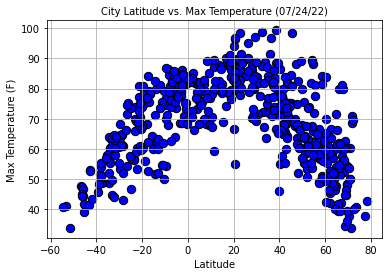

In [8]:
# Build scatter plot for each data type
plt.figure(figsize=(6,4))
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

# Create plot:
plt.scatter(x_values,y_values, marker='o', color="blue", s=[70], edgecolors="black")
#plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title("City Latitude vs. Max Temperature (07/24/22)", fontsize=10)
plt.ylabel("Max Temperature (F)", fontsize=10, color="black")
plt.xlabel("Latitude", fontsize=10, color="black")
plt.grid(True)
plt.show()

## Latitude vs. Humidity Plot

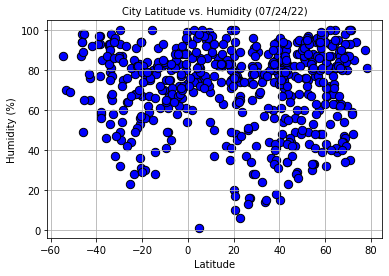

In [9]:
# Build scatter plot for each data type
plt.figure(figsize=(6,4))
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

# Create plot:
plt.scatter(x_values,y_values, marker='o', color="blue", s=[70], edgecolors="black")
#plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title("City Latitude vs. Humidity (07/24/22)", fontsize=10)
plt.ylabel("Humidity (%)", fontsize=10, color="black")
plt.xlabel("Latitude", fontsize=10, color="black")
plt.grid(True)
plt.show()

## Latitude vs. Cloudiness Plot

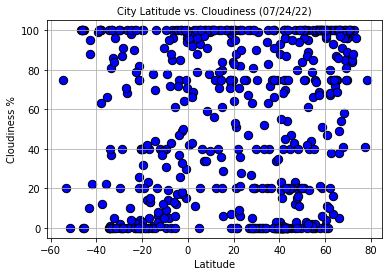

In [10]:
# Build scatter plot for each data type
plt.figure(figsize=(6,4))
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

# Create plot:
plt.scatter(x_values,y_values, marker='o', color="blue", s=[70], edgecolors="black")
#plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title("City Latitude vs. Cloudiness (07/24/22)", fontsize=10)
plt.ylabel("Cloudiness %", fontsize=10, color="black")
plt.xlabel("Latitude", fontsize=10, color="black")
plt.grid(True)
plt.show()

## Latitude vs. Wind Speed Plot

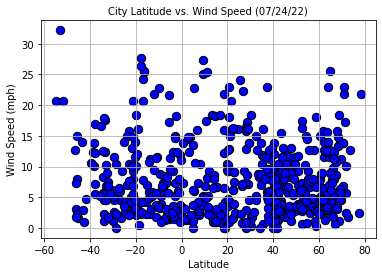

In [11]:
# Build scatter plot for each data type
plt.figure(figsize=(6,4))
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

# Create plot:
plt.scatter(x_values,y_values, marker='o', color="blue", s=[70], edgecolors="black")

# Incorporate the other graph properties:
plt.title("City Latitude vs. Wind Speed (07/24/22)", fontsize=10)
plt.ylabel("Wind Speed (mph)", fontsize=10, color="black")
plt.xlabel("Latitude", fontsize=10, color="black")
plt.grid(True)
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [12]:
# Find cities located in the Northern Hemisphere
northern_hemisphere_df = city_data_df.loc[(city_data_df["Lat"]>0)]
northern_hemisphere_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,66.72,68,75,11.50,CA,1658972293
2,Baruun-Urt,46.6806,113.2792,68.25,42,12,2.93,MN,1658972301
3,Raudeberg,61.9875,5.1352,45.27,72,20,6.44,NO,1658972302
4,Manduria,40.4018,17.6335,78.98,81,0,9.82,IT,1658972302
5,Ayutla,20.1167,-104.3333,66.69,87,100,3.49,MX,1658972302
...,...,...,...,...,...,...,...,...,...
560,San Pedro,14.3500,121.0167,86.36,83,75,8.05,PH,1658972959
561,Canton,23.1167,113.2500,91.35,47,28,3.85,CN,1658973008
562,Bahir Dar,11.5936,37.3908,59.45,93,100,3.36,ET,1658973122
563,Vikersund,59.9659,9.9950,59.49,63,100,2.24,NO,1658973182


The r-value is: -0.6725217091481905


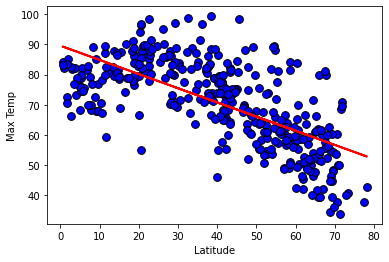

In [13]:
# Northern Hemisphere - Mex Temp vs. Latitude Linear Regression
plt.figure(figsize=(6,4))
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Max Temp"]

# Perform a linear regression on Max Temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values, y_values, marker="o", color="blue", s=[60], edgecolors="black")
plt.plot(x_values, regress_values,"red", linewidth=2)

# Additional graph properties
plt.xlabel("Latitude", fontsize=10, color="black")
plt.ylabel("Max Temp", fontsize=10, color="black")
#plt.annotate(line_equation,(15,8.000000e+04), fontsize=10, color="red")
#plt.ticklabel_format(style="plain")

# Print r-squared value:
print(f"The r-value is: {rvalue}")

# Save the figure:
# plt.savefig('output_data/Bedrooms vs. Price.png')

# Show plot:
plt.show()

In [14]:
# Create dataframe for cities in the southern hemisphere
southern_hemisphere_df = city_data_df.loc[(city_data_df["Lat"]<0)]
southern_hemisphere_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Bluff,-46.6000,168.3333,47.80,87,100,12.66,NZ,1658972142
6,Rikitea,-23.1203,-134.9692,74.03,68,100,15.84,PF,1658972303
12,Mataura,-46.1927,168.8643,47.48,98,100,3.13,NZ,1658972304
14,Hobart,-42.8794,147.3294,53.06,65,88,3.00,AU,1658972305
17,Vaini,-21.2000,-175.2000,80.76,83,20,9.22,TO,1658972140
...,...,...,...,...,...,...,...,...,...
547,Mitsamiouli,-11.3847,43.2844,75.54,70,37,5.73,KM,1658973119
556,Sao Joao Da Barra,-21.6403,-41.0511,69.06,82,0,10.04,BR,1658973121
557,Benjamin Constant,-4.3831,-70.0311,77.13,88,72,2.35,BR,1658973121
564,Domoni,-12.2569,44.5319,73.42,72,1,9.48,KM,1658973183


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7653025788355731


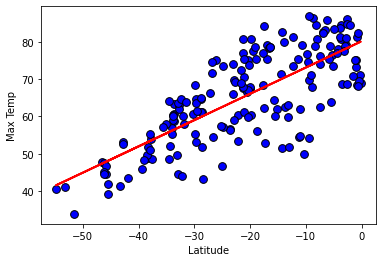

In [15]:
# Southern Hemisphere: Max Temp vs. Latitude Linear Regression
plt.figure(figsize=(6,4))
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Max Temp"]

# Perform a linear regression on Max Temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values, y_values, marker="o", color="blue", s=[60], edgecolors="black")
plt.plot(x_values, regress_values,"red", linewidth=2)

# Additional graph properties
plt.xlabel("Latitude", fontsize=10, color="black")
plt.ylabel("Max Temp", fontsize=10, color="black")
#plt.annotate(line_equation,(15,8.000000e+04), fontsize=10, color="red")
#plt.ticklabel_format(style="plain")

# Print r-squared value:
print(f"The r-value is: {rvalue}")

# Save the figure:
# plt.savefig('output_data/Bedrooms vs. Price.png')

# Show plot:
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.0037669119374901857


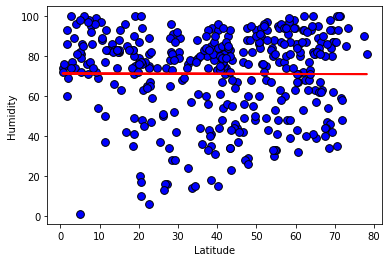

In [16]:
# Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression
plt.figure(figsize=(6,4))
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Humidity"]

# Perform a linear regression on Max Temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values, y_values, marker="o", color="blue", s=[60], edgecolors="black")
plt.plot(x_values, regress_values,"red", linewidth=2)

# Additional graph properties
plt.xlabel("Latitude", fontsize=10, color="black")
plt.ylabel("Humidity", fontsize=10, color="black")
#plt.annotate(line_equation,(15,8.000000e+04), fontsize=10, color="red")
#plt.ticklabel_format(style="plain")

# Print r-squared value:
print(f"The r-value is: {rvalue}")

# Save the figure:
# plt.savefig('output_data/Bedrooms vs. Price.png')

# Show plot:
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.7653025788355731


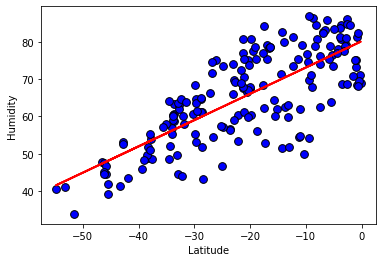

In [19]:
# Southern Hemisphere: Humidity(%) vs. Latitude Linear Regression
plt.figure(figsize=(6,4))
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Max Temp"]

# Perform a linear regression on Max Temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values, y_values, marker="o", color="blue", s=[60], edgecolors="black")
plt.plot(x_values, regress_values,"red", linewidth=2)

# Additional graph properties
plt.xlabel("Latitude", fontsize=10, color="black")
plt.ylabel("Humidity", fontsize=10, color="black")
#plt.annotate(line_equation,(15,8.000000e+04), fontsize=10, color="red")
#plt.ticklabel_format(style="plain")

# Print r-squared value:
print(f"The r-value is: {rvalue}")

# Save the figure:
# plt.savefig('output_data/Bedrooms vs. Price.png')

# Show plot:
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.029754555108482343


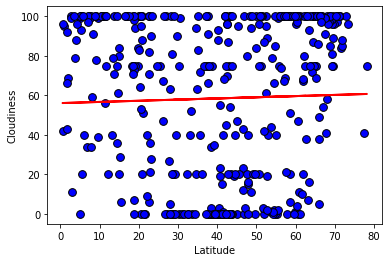

In [17]:
# Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression
plt.figure(figsize=(6,4))
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Cloudiness"]

# Perform a linear regression on Max Temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values, y_values, marker="o", color="blue", s=[60], edgecolors="black")
plt.plot(x_values, regress_values,"red", linewidth=2)

# Additional graph properties
plt.xlabel("Latitude", fontsize=10, color="black")
plt.ylabel("Cloudiness", fontsize=10, color="black")
#plt.annotate(line_equation,(15,8.000000e+04), fontsize=10, color="red")
#plt.ticklabel_format(style="plain")

# Print r-squared value:
print(f"The r-value is: {rvalue}")

# Save the figure:
# plt.savefig('output_data/Bedrooms vs. Price.png')

# Show plot:
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.03188529732429828


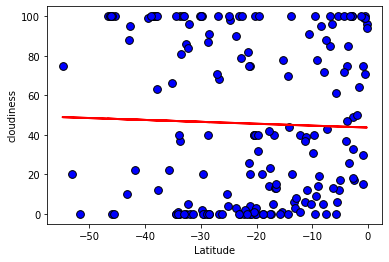

In [20]:
# Southern Hemisphere: Cloudiness(%) vs. Latitude Linear Regression
plt.figure(figsize=(6,4))
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Cloudiness"]

# Perform a linear regression on Max Temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values, y_values, marker="o", color="blue", s=[60], edgecolors="black")
plt.plot(x_values, regress_values,"red", linewidth=2)

# Additional graph properties
plt.xlabel("Latitude", fontsize=10, color="black")
plt.ylabel("cloudiness", fontsize=10, color="black")
#plt.annotate(line_equation,(15,8.000000e+04), fontsize=10, color="red")
#plt.ticklabel_format(style="plain")

# Print r-squared value:
print(f"The r-value is: {rvalue}")

# Save the figure:
# plt.savefig('output_data/Bedrooms vs. Price.png')

# Show plot:
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.00914815244435493


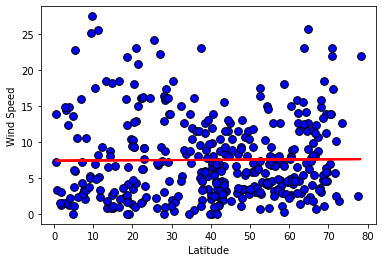

In [18]:
# Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression
plt.figure(figsize=(6,4))
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Wind Speed"]

# Perform a linear regression on Max Temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values, y_values, marker="o", color="blue", s=[60], edgecolors="black")
plt.plot(x_values, regress_values,"red", linewidth=2)

# Additional graph properties
plt.xlabel("Latitude", fontsize=10, color="black")
plt.ylabel("Wind Speed", fontsize=10, color="black")
#plt.annotate(line_equation,(15,8.000000e+04), fontsize=10, color="red")
#plt.ticklabel_format(style="plain")

# Print r-squared value:
print(f"The r-value is: {rvalue}")

# Save the figure:
# plt.savefig('output_data/Bedrooms vs. Price.png')

# Show plot:
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.12480445940390904


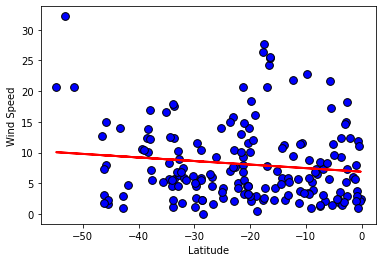

In [21]:
# Southern Hemisphere: Wind Speed vs. Latitude Linear Regression
plt.figure(figsize=(6,4))
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Wind Speed"]

# Perform a linear regression on Max Temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values, y_values, marker="o", color="blue", s=[60], edgecolors="black")
plt.plot(x_values, regress_values,"red", linewidth=2)

# Additional graph properties
plt.xlabel("Latitude", fontsize=10, color="black")
plt.ylabel("Wind Speed", fontsize=10, color="black")
#plt.annotate(line_equation,(15,8.000000e+04), fontsize=10, color="red")
#plt.ticklabel_format(style="plain")

# Print r-squared value:
print(f"The r-value is: {rvalue}")

# Save the figure:
# plt.savefig('output_data/Bedrooms vs. Price.png')

# Show plot:
plt.show()